i: 0 cost: 766.824271863 error: 0.502
i: 20 cost: 674.628363503 error: 0.401
i: 40 cost: 663.563350835 error: 0.392
i: 60 cost: 666.258070286 error: 0.436
i: 80 cost: 674.323981024 error: 0.44
best_validation_error: 1


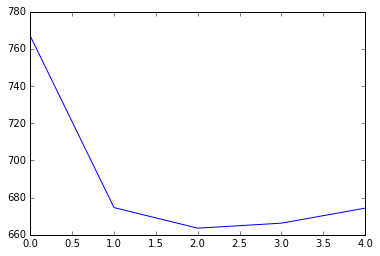

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate, relu

%matplotlib inline

class ANN(object):
    def __init__(self, M):
        self.M = M
        
    def fit(self, X, Y, learning_rate=5*10e-7, reg=1.0, epochs=100, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D + self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M) / np.sqrt(self.M)
        self.b2 = 0
        
        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation
            pY, Z = self.forward(X)
            
            # gradient descent step
            pY_Y = pY - Y
            self.W2 -= learning_rate*(Z.T.dot(pY_Y) + reg*self.W2)
            self.b2 -= learning_rate*((pY_Y).sum() + reg*self.b2)
            
#             dZ = np.outer(pY_Y, self.W2) * (Z > 0)
            # if tanh was your activation function
            dZ = np.outer(pY_Y, self.W2) * ( 1 - Z * Z )
    
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(np.sum(dZ, axis=0) + reg*self.b1)
            
            if i % 20 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    vest_validation_error = e
                    
        print("best_validation_error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
    
    def forward(self, X):
#         Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return sigmoid(Z.dot(self.W2) + self.b2), Z
    
    def predict(self, X):
        pY, _ = self.forward(X)
        return np.round(pY)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)
    

X, Y = getBinaryData()

X0 = X[Y==0, :]
X1 = X[Y==1, :]
X1 = np.repeat(X1, 9, axis=0)
X = np.vstack([X0, X1])
Y = np.array([0]*len(X0) + [1]*len(X1))

model = ANN(100)
model.fit(X, Y, show_fig=True)

In [ ]:
# now use logistic regression with softmax
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from util import getData, softmax, cost, y2indicator
from sklearn.utils import shuffle

X, Y = getData()

class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=10e-8, reg=10e-12, epochs=100, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K) / np.sqrt(D + K)
        self.b = np.zeros(K)
        
        costs = []
        best_validation_error = 1
        
        for i in range(epochs):
            pY = self.forward(X)
            
            #gradient descent
            self.W -= learning_rate*(X.T.dot(pY - T) + reg*self.W)
            self.b -= learning_rate*((pY - T).sum(axis=0) + reg*self.b)
            
            if i % 10 == 0:
                pYvalid = self.forward(Xvalid)
                c = cost(Tvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)
    


model = LogisticModel()
model.fit(X, Y, show_fig=True)
print(model.score(X, Y))

In [ ]:
# now use logistic regression with softmax
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from util import getData, softmax, cost2, y2indicator, error_rate, relu
from sklearn.utils import shuffle

class ANN1(object):
    def __init__(self, M):
        self.M = M
        
    def fit(self, X, Y, learning_rate=10e-6, reg=10e-1, epochs=100, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000]
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D + self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M + K)
        self.b2 = np.zeros(K)
        
        costs = []
        best_validation_error = 1
        for i in range(epochs):
            pY, Z = self.forward(X)
            
            # gradient descent step
            pY_T = pY - T
            self.W2 -= learning_rate*(Z.T.dot(pY_T) + reg*self.W2)
            self.b2 -= learning_rate*(pY_T.sum(axis=0) + reg*self.b2)
            
            # relu derivative is dZ = pY_T.dot(self.W2.T) * (Z>0)
            dZ = pY_T.dot(self.W2.T) * (1 - Z*Z)
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(dZ.sum(axis=0) + reg*self.b1)
            
            if i % 10 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = cost2(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
                    
        print("best_validation_error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        # Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return softmax(Z.dot(self.W2) + self.b2), Z
    
    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=1)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

In [ ]:
X, Y = getData()

In [ ]:
model = ANN1(100)
model.fit(X, Y, show_fig=True)
print(model.score(X, Y))

In [ ]:
class ANN2(object):
    def __init__(self, M):
        self.M = M

    # learning rate 10e-6 is too large
    def fit(self, X, Y, learning_rate=10e-7, reg=10e-7, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        # Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D + self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M + K)
        self.b2 = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost calculation
            pY, Z = self.forward(X)

            # gradient descent step
            pY_T = pY - T
            self.W2 -= learning_rate*(Z.T.dot(pY_T) + reg*self.W2)
            self.b2 -= learning_rate*(pY_T.sum(axis=0) + reg*self.b2)
            # dZ = pY_T.dot(self.W2.T) * (Z > 0) # relu
            dZ = pY_T.dot(self.W2.T) * (1 - Z*Z) # tanh
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(dZ.sum(axis=0) + reg*self.b1)

            if i % 10 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = cost2(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        # Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return softmax(Z.dot(self.W2) + self.b2), Z

    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

In [ ]:
X, Y = getData()

In [ ]:
model = ANN2(200)
model.fit(X, Y, reg=0, show_fig=True)
print(model.score(X, Y))